In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

<h1>Linear Damage</h1>

In [2]:
df = pd.read_csv('input\\results_complete_linear.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['elem_damaged', 'damage'], axis=1), df['elem_damaged'], test_size=0.10, random_state=41)

In [4]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [5]:
%%time
model = RandomForestClassifier(n_jobs=6, random_state=41)
model.fit(X_train, y_train)
pred = model.predict(X_test)

CPU times: total: 8min 41s
Wall time: 1min 49s


<h3>Components from PCA</h3>

In [6]:
pca.n_components_

57

<h3>Classification Report</h3>

In [7]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    0.50000   1.00000   0.66667        19
           1    1.00000   1.00000   1.00000        20
           2    1.00000   1.00000   1.00000        19
           3    1.00000   1.00000   1.00000        23
           4    1.00000   1.00000   1.00000        26
           5    1.00000   1.00000   1.00000        18
           6    1.00000   1.00000   1.00000        24
           7    1.00000   1.00000   1.00000        25
           8    1.00000   1.00000   1.00000        17
           9    1.00000   0.96154   0.98039        26
          10    1.00000   1.00000   1.00000        25
          11    1.00000   1.00000   1.00000        21
          12    1.00000   1.00000   1.00000        23
          13    1.00000   1.00000   1.00000        22
          14    1.00000   1.00000   1.00000        23
          15    1.00000   1.00000   1.00000        18
          16    1.00000   1.00000   1.00000        16
          17    1.00000   1

<h3>Feature Importance</h3>

<BarContainer object of 57 artists>

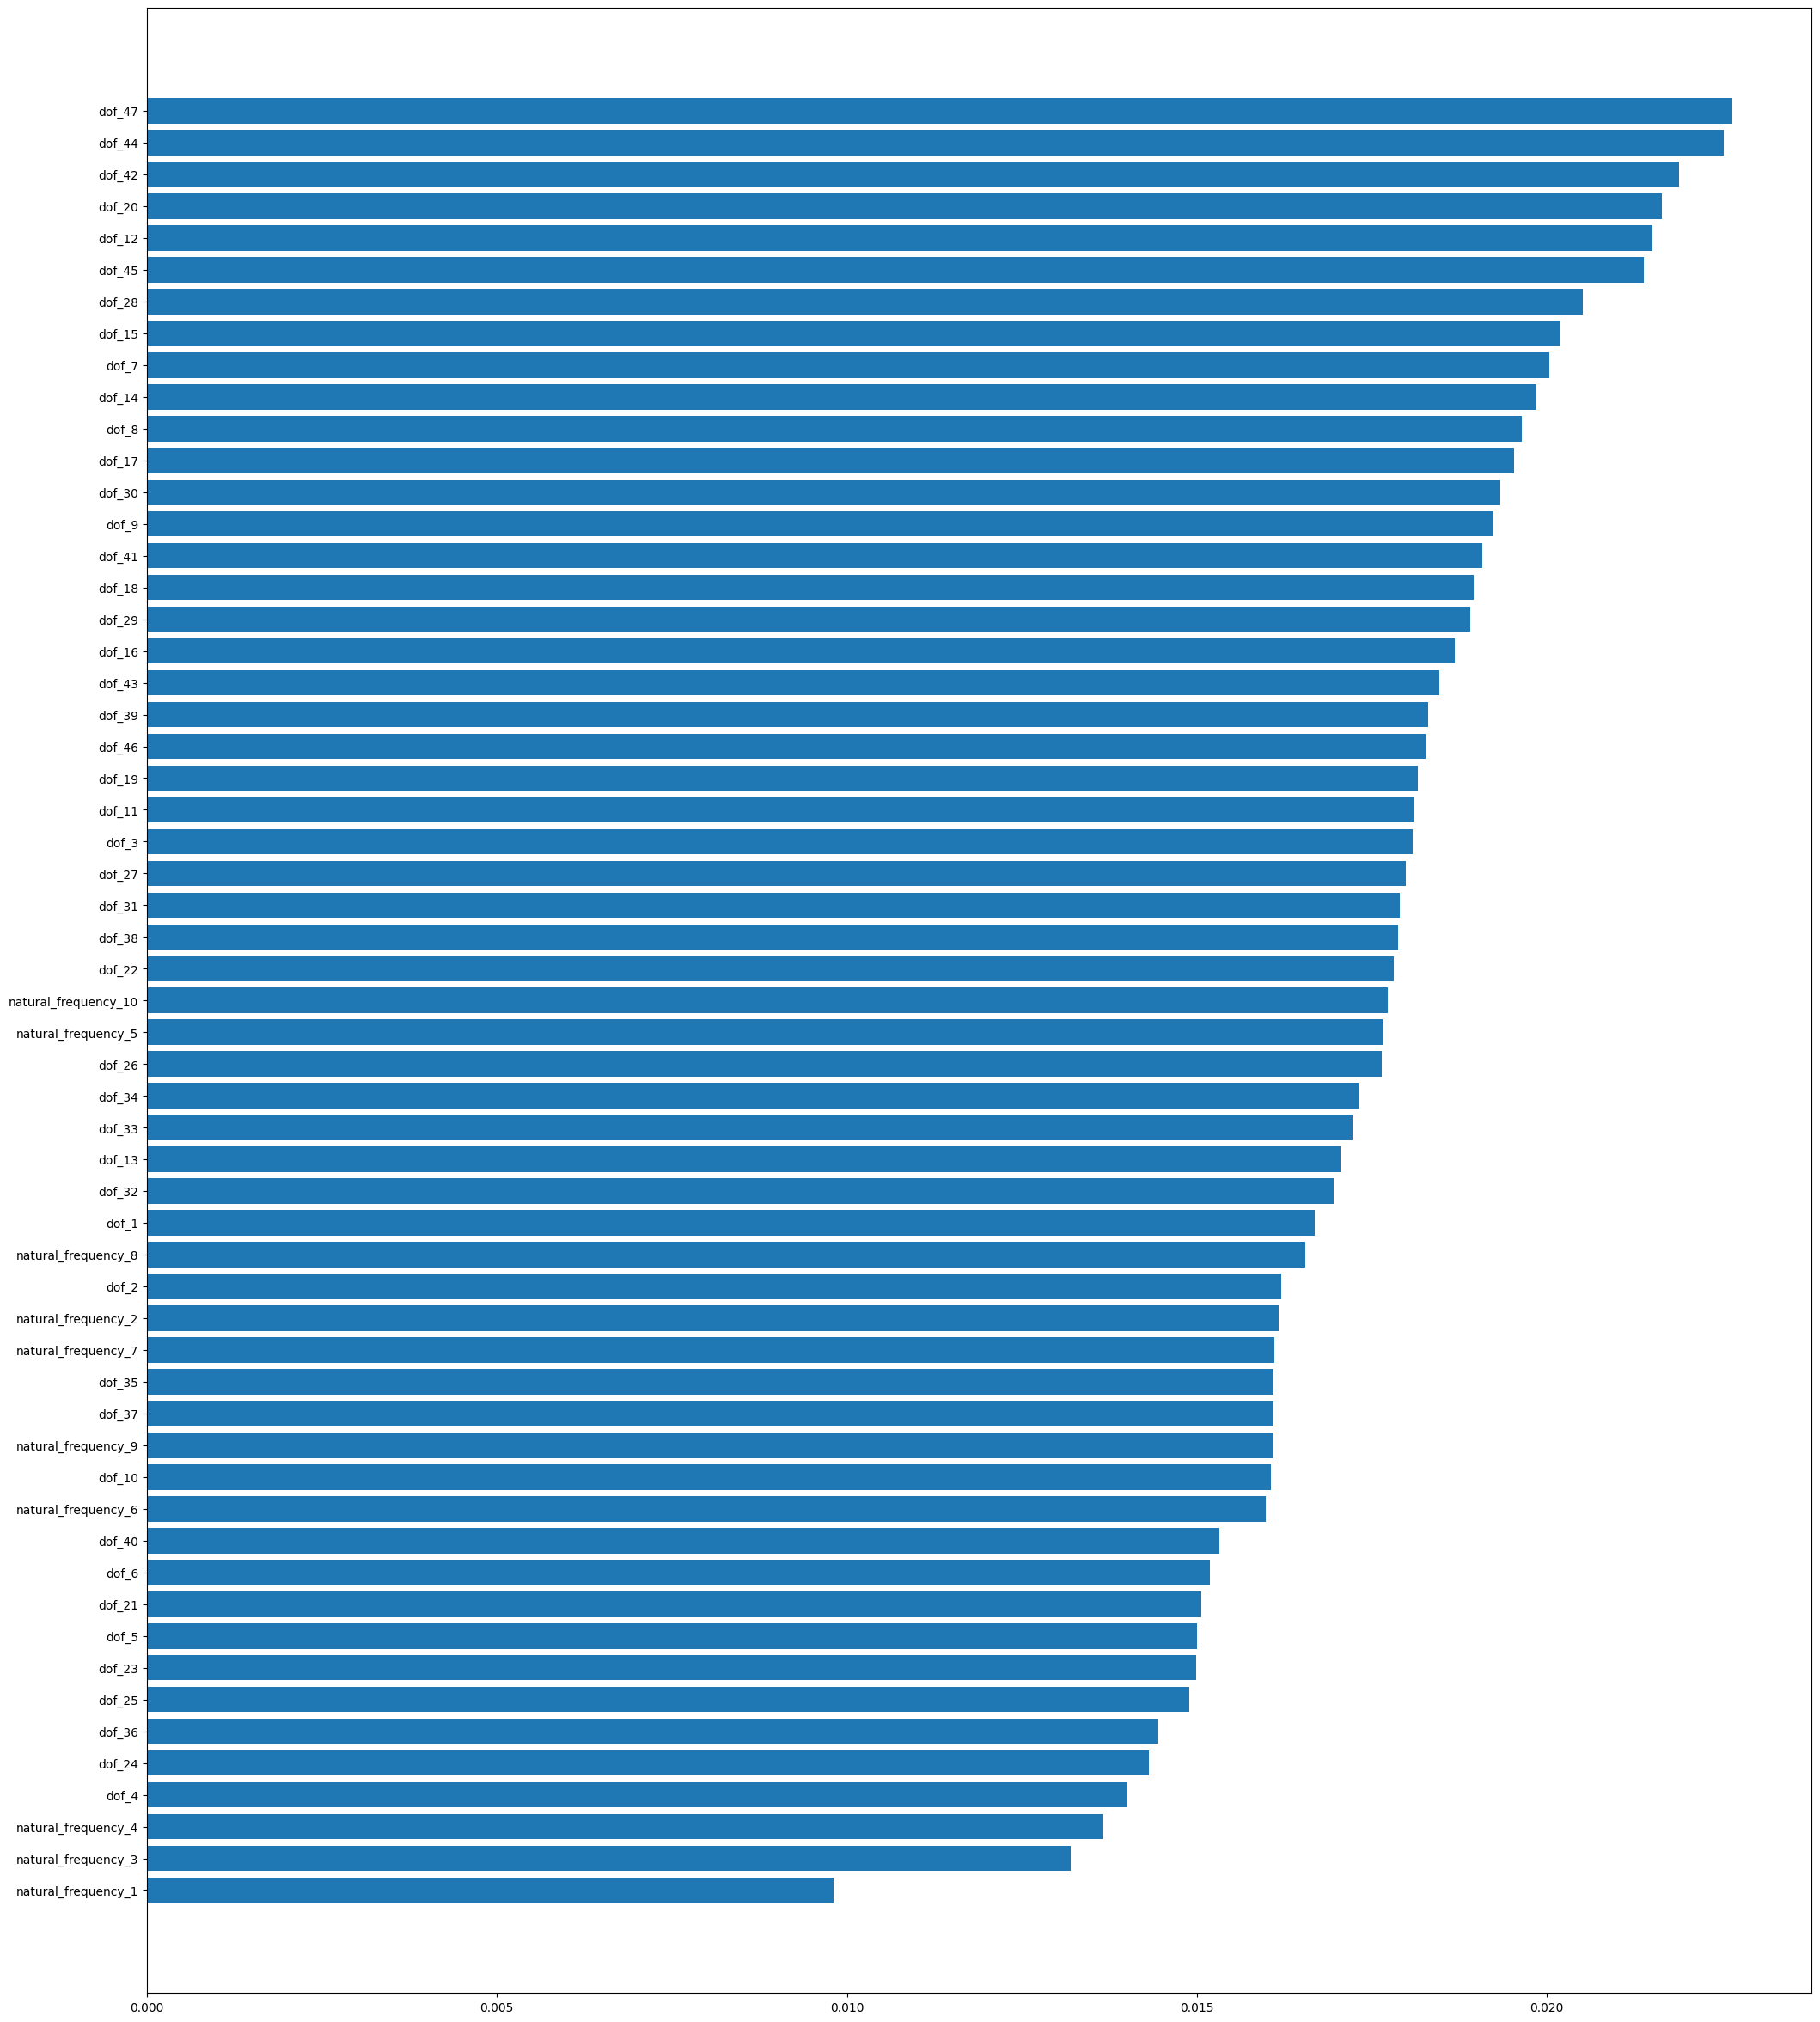

In [8]:
sorted_idx = model.feature_importances_.argsort()

plt.figure(figsize=(25,30))
plt.barh(df.drop(['elem_damaged', 'damage'], axis=1).columns[sorted_idx], model.feature_importances_[sorted_idx])

<h1>Exponential Damage</h1>

In [9]:
df_exp = pd.read_csv('input\\results_complete_exponential.csv')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['elem_damaged', 'damage'], axis=1), df_exp['elem_damaged'], test_size=0.20, random_state=41)

In [11]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [12]:
%%time
model = RandomForestClassifier(n_jobs=6, random_state=41)
model.fit(X_train, y_train)
pred = model.predict(X_test)

CPU times: total: 7min 53s
Wall time: 1min 39s


<h3>Components from PCA</h3>

In [13]:
pca.n_components_

60

<h3>Classification Report</h3>

In [14]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    0.28986   1.00000   0.44944        40
           1    1.00000   1.00000   1.00000        38
           2    1.00000   0.97297   0.98630        37
           3    1.00000   1.00000   1.00000        48
           4    1.00000   1.00000   1.00000        39
           5    1.00000   1.00000   1.00000        39
           6    1.00000   1.00000   1.00000        42
           7    1.00000   1.00000   1.00000        47
           8    1.00000   1.00000   1.00000        44
           9    1.00000   0.92857   0.96296        42
          10    1.00000   1.00000   1.00000        51
          11    1.00000   0.97872   0.98925        47
          12    1.00000   0.98000   0.98990        50
          13    1.00000   1.00000   1.00000        37
          14    1.00000   1.00000   1.00000        43
          15    1.00000   0.97500   0.98734        40
          16    1.00000   1.00000   1.00000        30
          17    1.00000   1

<h3>Feature Importance</h3>

<BarContainer object of 60 artists>

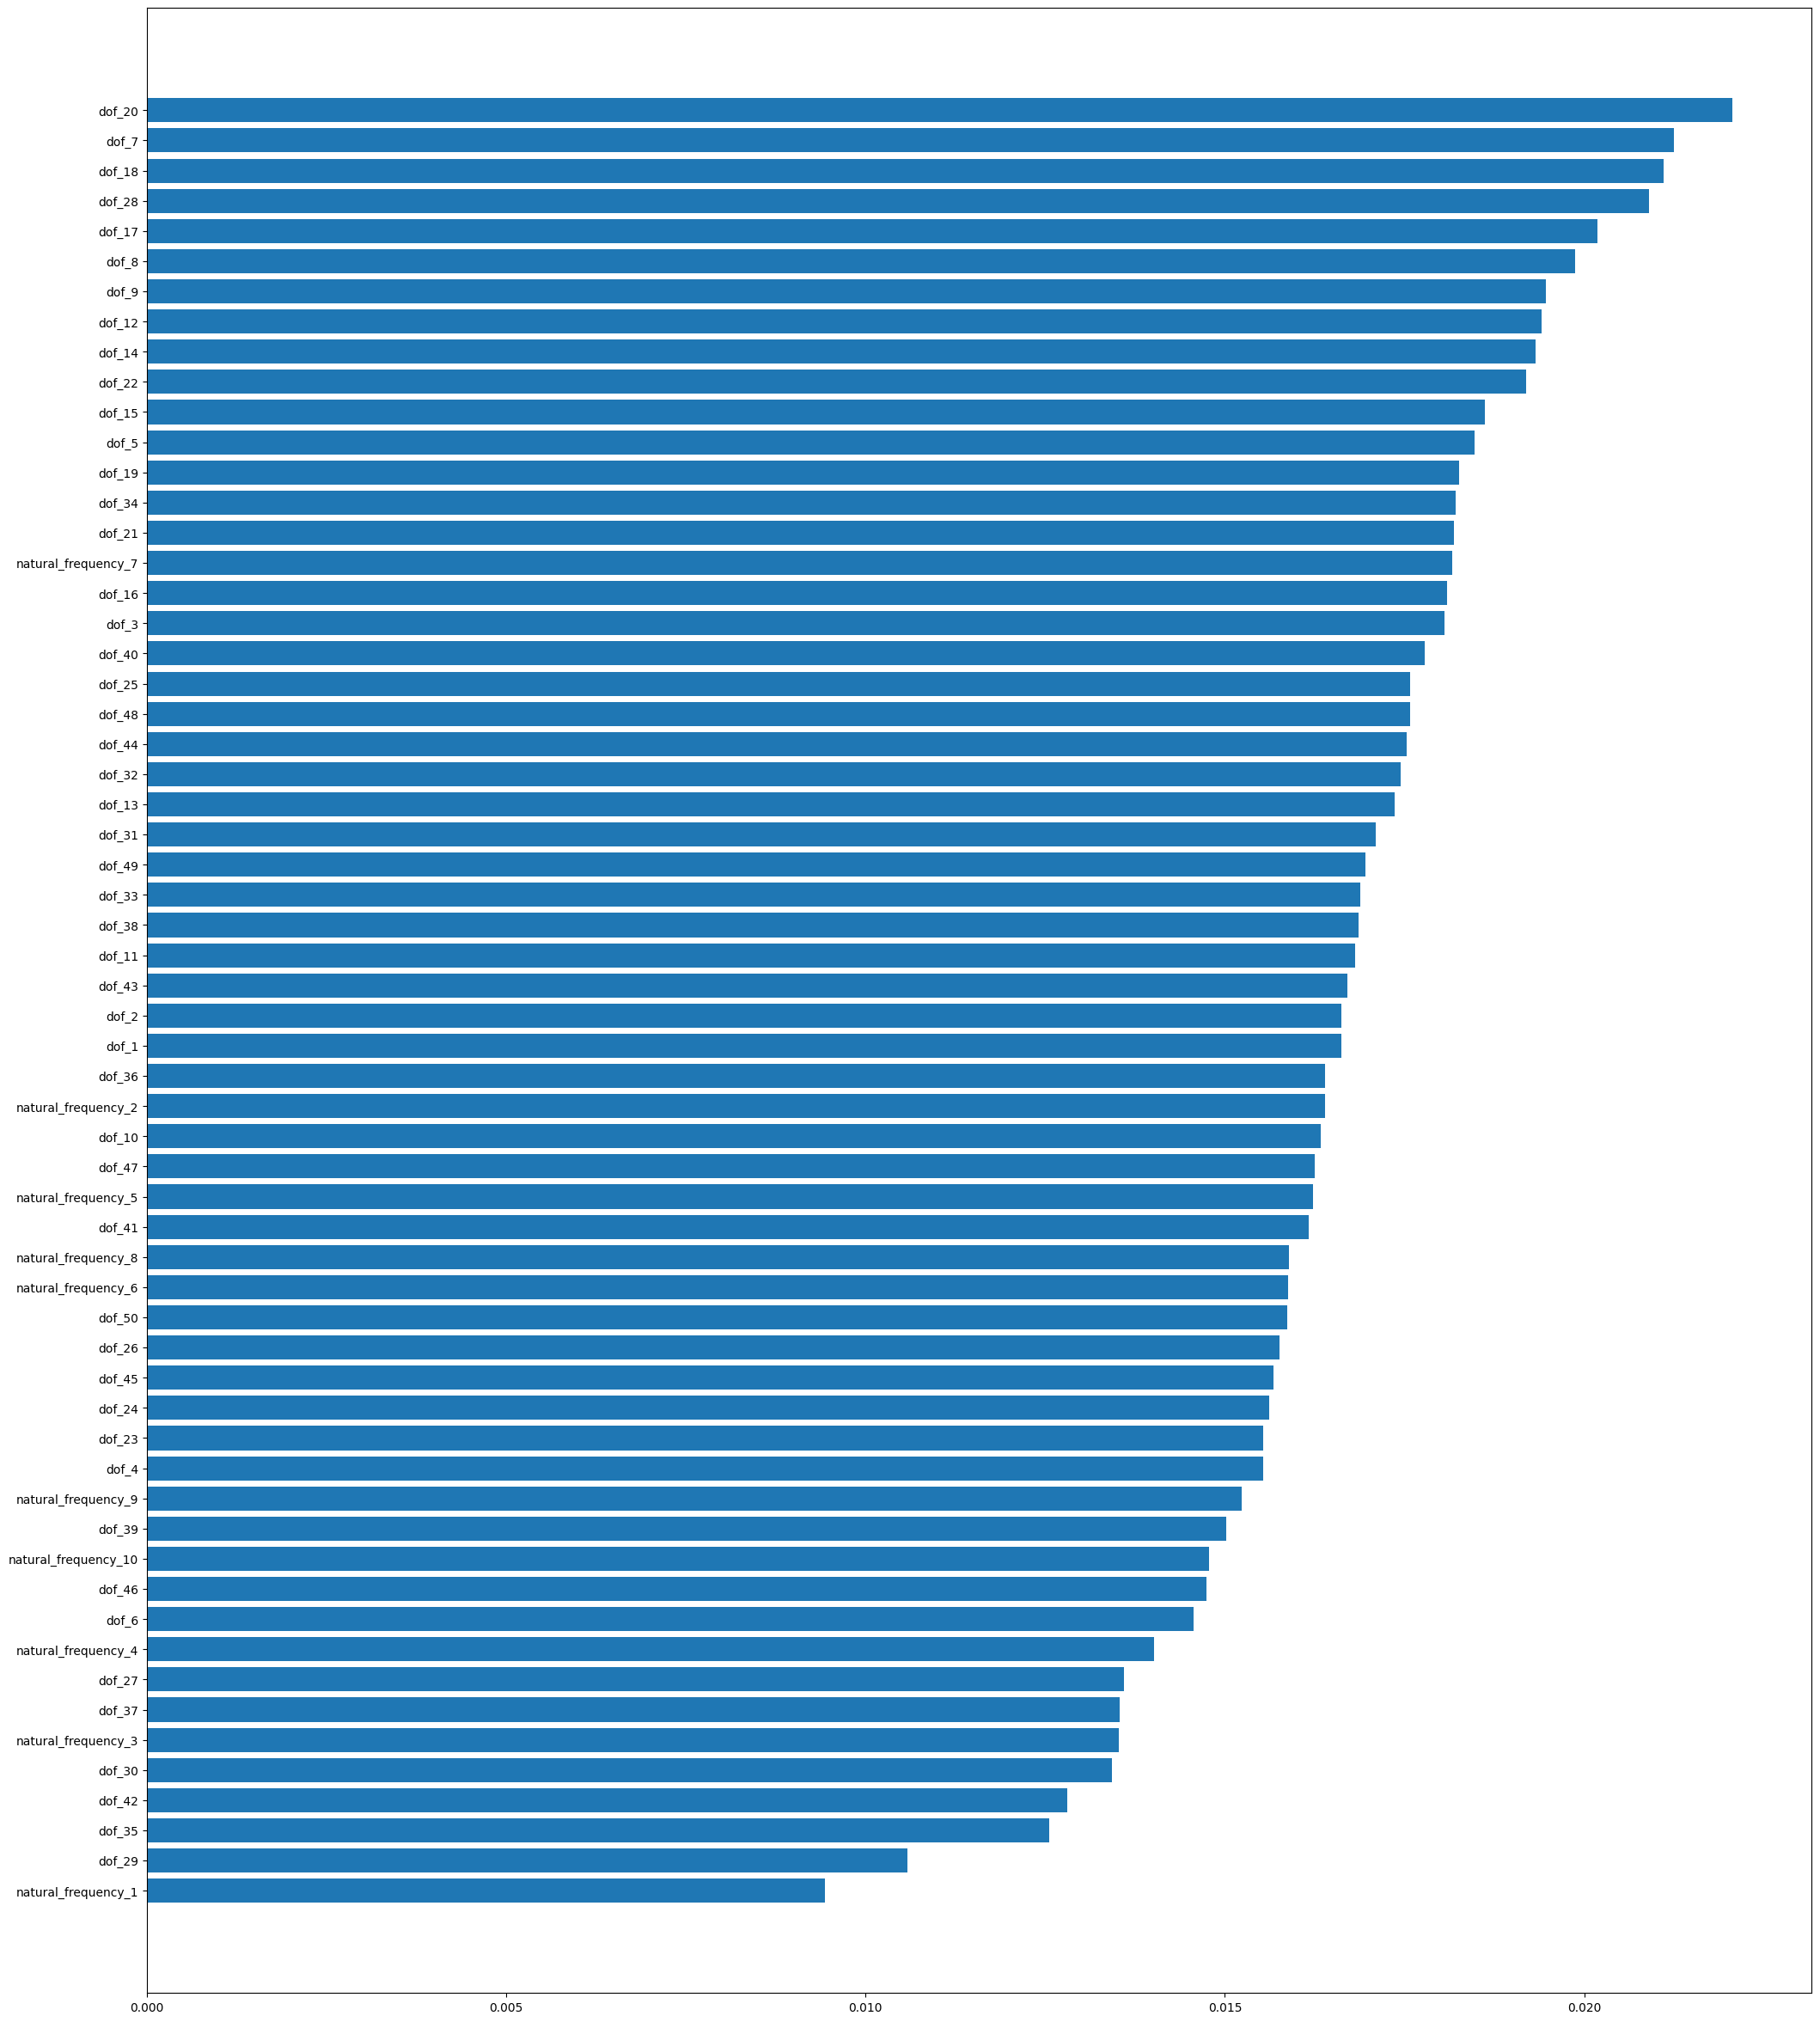

In [15]:
sorted_idx = model.feature_importances_.argsort()

plt.figure(figsize=(25,30))
plt.barh(df_exp.drop(['elem_damaged', 'damage'], axis=1).columns[sorted_idx], model.feature_importances_[sorted_idx])

<h1>Sigmoid-like Damage</h1>

In [16]:
df_sig = pd.read_csv('input\\results_complete_sigmoid_like.csv')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['elem_damaged', 'damage'], axis=1), df_sig['elem_damaged'], test_size=0.20, random_state=41)

In [18]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [19]:
%%time
model = RandomForestClassifier(n_jobs=6, random_state=41)
model.fit(X_train, y_train)
pred = model.predict(X_test)

CPU times: total: 9min 31s
Wall time: 1min 58s


<h3>Components from PCA</h3>

In [20]:
pca.n_components_

88

<h3>Classification Report</h3>

In [21]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    0.14235   1.00000   0.24922        40
           1    1.00000   0.97368   0.98667        38
           2    1.00000   0.94595   0.97222        37
           3    1.00000   0.97917   0.98947        48
           4    1.00000   1.00000   1.00000        39
           5    1.00000   0.94872   0.97368        39
           6    1.00000   1.00000   1.00000        42
           7    1.00000   1.00000   1.00000        47
           8    1.00000   0.97727   0.98851        44
           9    1.00000   0.92857   0.96296        42
          10    1.00000   1.00000   1.00000        51
          11    1.00000   1.00000   1.00000        47
          12    1.00000   0.98000   0.98990        50
          13    1.00000   0.97297   0.98630        37
          14    1.00000   1.00000   1.00000        43
          15    1.00000   0.97500   0.98734        40
          16    1.00000   1.00000   1.00000        30
          17    1.00000   1

<h3>Feature Importance</h3>

<BarContainer object of 88 artists>

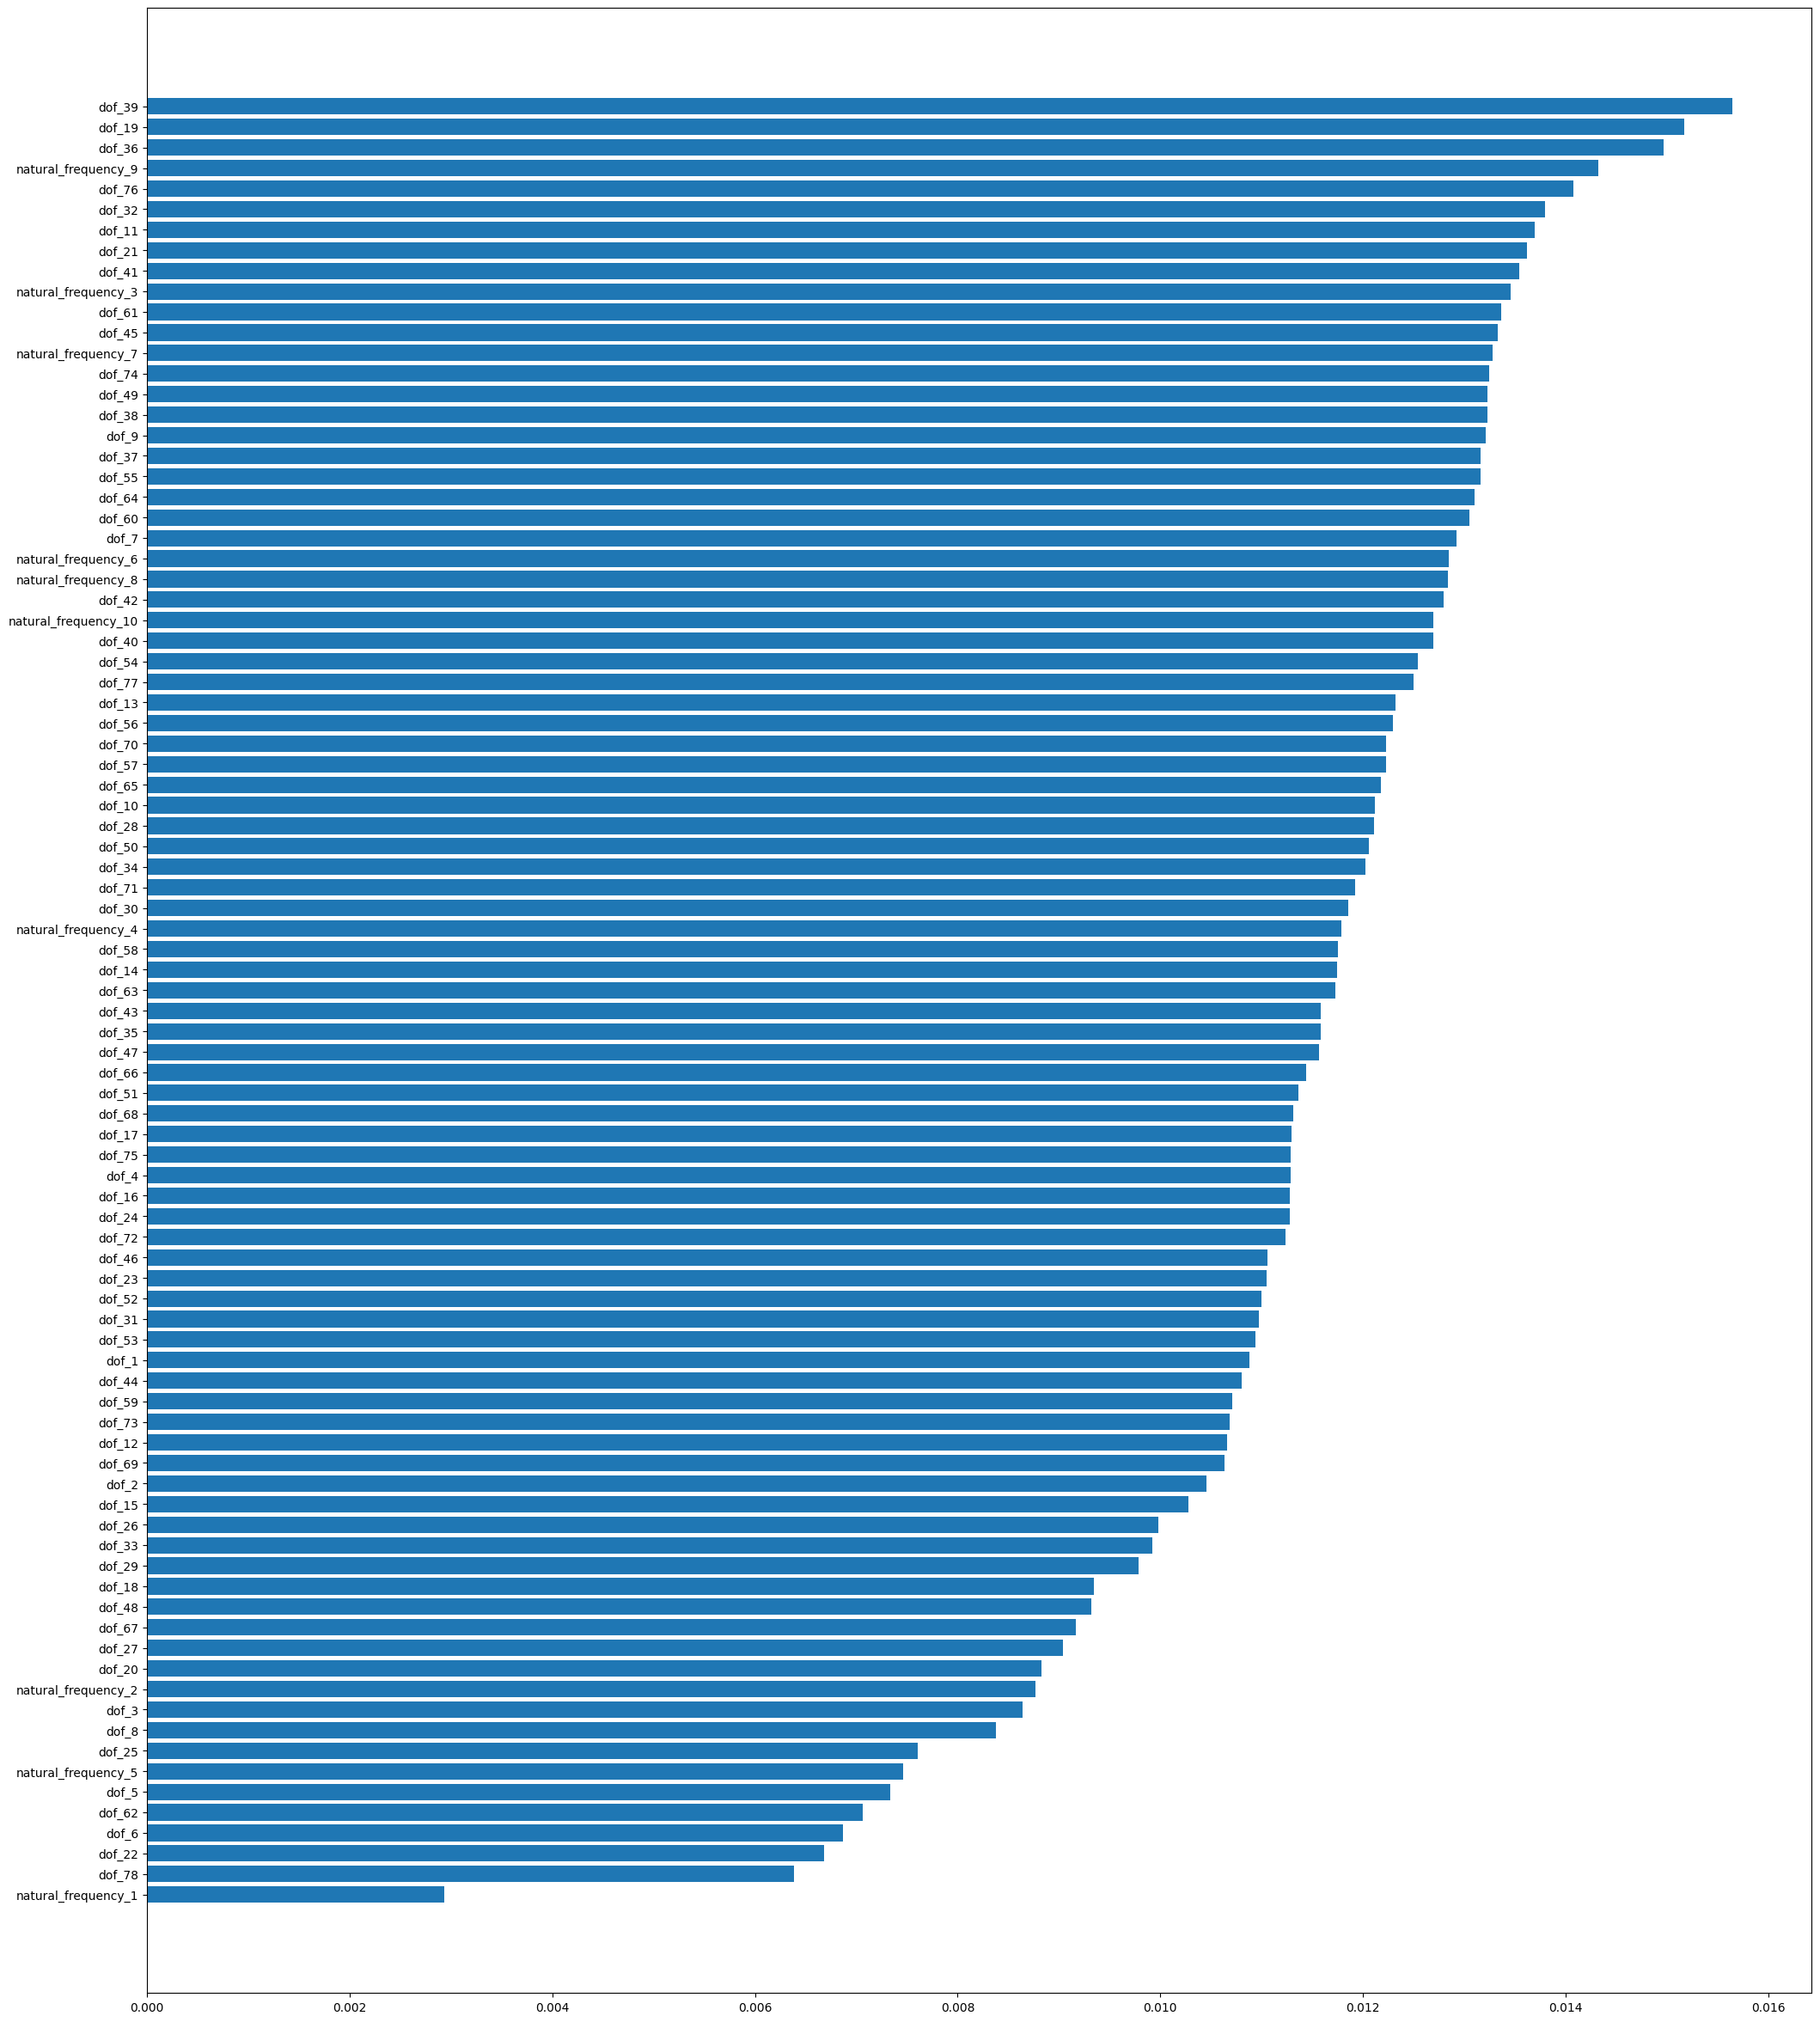

In [22]:
sorted_idx = model.feature_importances_.argsort()

plt.figure(figsize=(25,30))
plt.barh(df_sig.drop(['elem_damaged', 'damage'], axis=1).columns[sorted_idx], model.feature_importances_[sorted_idx])